In [5]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from typing import List, Dict, Optional
from enum import Enum
from dataclasses import dataclass
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [6]:
## Load Test/Train Data
DATA = {
    "A": {
        "train": {
            "X": np.loadtxt(open("a1-files/X_train_A.csv"), delimiter=","),
            "Y": np.loadtxt(open("a1-files/Y_train_A.csv"), delimiter=","),
        },
        "test": {
            "X": np.loadtxt(open("a1-files/X_test_A.csv"), delimiter=","),
            "Y": np.loadtxt(open("a1-files/Y_test_A.csv"), delimiter=","),
        }
    },
    "B": {
        "train": {
            "X": np.loadtxt(open("a1-files/X_train_B.csv"), delimiter=","),
            "Y": np.loadtxt(open("a1-files/Y_train_B.csv"), delimiter=","),
        },
        "test": {
            "X": np.loadtxt(open("a1-files/X_test_B.csv"), delimiter=","),
            "Y": np.loadtxt(open("a1-files/Y_test_B.csv"), delimiter=","),
        }
    },
    "C": {
        "train": {
            "X": np.loadtxt(open("a1-files/X_train_C.csv"), delimiter=","),
            "Y": np.loadtxt(open("a1-files/Y_train_C.csv"), delimiter=","),
        },
        "test": {
            "X": np.loadtxt(open("a1-files/X_test_C.csv"), delimiter=","),
            "Y": np.loadtxt(open("a1-files/Y_test_C.csv"), delimiter=","),
        }
    }
}

In [7]:
# Define Test Enviroment
class SKLearnTestEnv:
    @dataclass
    class TestObject:
        model: "linear_model"
        # result placeholders
        y_pred: Optional[List[float]] = None
        w:      Optional[List[float]] = None
        b:      Optional[float] = None
        MSE:    Optional[float] = None

    class TEST_TYPE(Enum):
        LINEAR_REG      = "LINEAR_REG"
        RIDGE_REG_1     = "RIDGE_REG_1"
        RIDGE_REG_10    = "RIDGE_REG_10"
        LASSO_1         = "LASSO_1"
        LASSO_10        = "LASSO_10"

    def __init__(self, data_set: Dict, tag: str):
        self._data_set = data_set
        self._N_train_sample = len(self._data_set["train"]["X"])
        self._tag = tag
        # setup 5 test objects
        self._tests = {
            self.TEST_TYPE.LINEAR_REG    : self.TestObject(model=linear_model.LinearRegression()),
            self.TEST_TYPE.RIDGE_REG_1   : self.TestObject(model=linear_model.Ridge(alpha=1)),
            self.TEST_TYPE.RIDGE_REG_10  : self.TestObject(model=linear_model.Ridge(alpha=10)),
            self.TEST_TYPE.LASSO_1       : self.TestObject(model=linear_model.Lasso(alpha=1/self._N_train_sample)),
            self.TEST_TYPE.LASSO_10      : self.TestObject(model=linear_model.Lasso(alpha=10/self._N_train_sample))
        }

    def run(self):
        for test_name, test in self._tests.items():
            # train:
            test.model.fit(self._data_set["train"]["X"], self._data_set["train"]["Y"])
            # predict:
            test.y_pred = test.model.predict(self._data_set["test"]["X"])
            # evaluate:
            test.MSE = mean_squared_error(self._data_set["test"]["Y"], test.y_pred)
            # log:
            test.w = test.model.coef_
            test.b = test.model.intercept_

    def genReport(self, bin_size:int=10):
        fig1 = plt.gcf()
        legends = []
        ws = []
        for test_name, test in self._tests.items():
            if test.b is None:
                pass
            print("[{name:10s}] MSE:{mse:.5f}".format(name=test_name.value,mse=test.MSE))
            # plot histogram:
            plt.hist(test.w, density=True, alpha=0.3, histtype='stepfilled', edgecolor='none', bins=bin_size)
            legends.append(test_name.value)
            ws.append(test.w)
        # plot result
        plt.legend(legends)
        plt.title("Vector Parameter Histogram for Dataset {0}".format(self._tag))
        plt.xlabel("w values")
        plt.show()
        fig1.savefig("figs/ex3-3_hist_{tag}.png".format(tag = self._tag), bbox_inches = 'tight')
        # plot summary graphy in split hist.
        fig2 = plt.gcf()
        plt.hist(ws, density=True, alpha=0.6, histtype='bar', bins=bin_size)
        plt.legend(legends)
        plt.title("Vector Parameter Histogram for Dataset {0}".format(self._tag))
        plt.xlabel("w values")
        plt.show()
        fig2.savefig("figs/ex3-3_hist_{tag}_sep.png".format(tag = self._tag), bbox_inches = 'tight')

[LINEAR_REG] MSE:3.24740
[RIDGE_REG_1] MSE:3.13939
[RIDGE_REG_10] MSE:2.77803
[LASSO_1   ] MSE:3.02040
[LASSO_10  ] MSE:3.60263


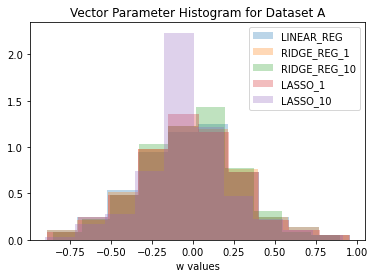

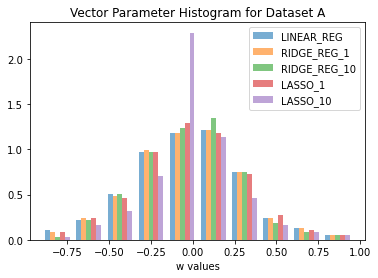

[LINEAR_REG] MSE:2.74268
[RIDGE_REG_1] MSE:2.61621
[RIDGE_REG_10] MSE:2.05971
[LASSO_1   ] MSE:2.26517
[LASSO_10  ] MSE:1.80967


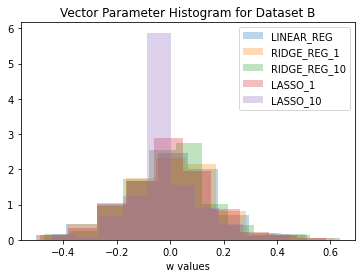

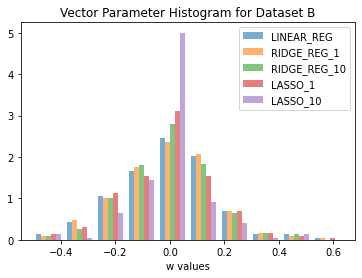

[LINEAR_REG] MSE:506.37271
[RIDGE_REG_1] MSE:505.27731
[RIDGE_REG_10] MSE:515.89174
[LASSO_1   ] MSE:1.87747
[LASSO_10  ] MSE:1.35256


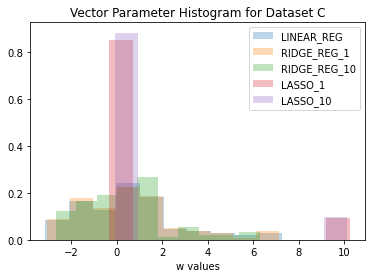

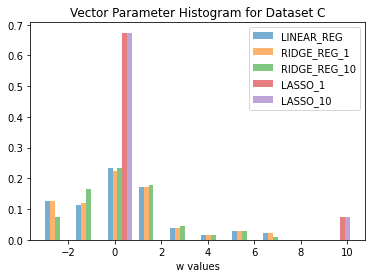

In [8]:
# Lets test all three datasets:
for test_name, test_data in DATA.items():
    test_env = SKLearnTestEnv(data_set=test_data, tag=test_name)
    test_env.run()
    test_env.genReport()
